In [1]:
import numpy as np
import pandas as pd

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
d_f = pd.read_csv('Book-01.csv')

In [4]:
d_f.columns

Index(['Attrition', 'Business Travel', 'CF_age band', 'CF_attrition label',
       'Department', 'Education Field', 'Employee Number', 'Gender',
       'Job Role', 'Marital Status', 'Over Time', 'Training Times Last Year',
       'Age', 'CF_attrition count', 'CF_attrition rate', 'CF_current Employee',
       'Daily Rate', 'Distance From Home', 'Education',
       'Environment Satisfaction', 'Hourly Rate', 'Job Involvement',
       'Job Level', 'Job Satisfaction', 'Monthly Income', 'Monthly Rate',
       'Num Companies Worked', 'Percent Salary Hike', 'Performance Rating',
       'Relationship Satisfaction', 'Standard Hours', 'Stock Option Level',
       'Total Working Years', 'Work Life Balance', 'Years At Company',
       'Years In Current Role', 'Years Since Last Promotion',
       'Years With Curr Manager'],
      dtype='object')

In [5]:
df = d_f[['CF_age band','Education Field','Marital Status','Job Role','CF_attrition count']]

In [6]:
df.head()

,CF_age band,Education Field,Marital Status,Job Role,CF_attrition count
0,35 - 44,Life Sciences,Single,Sales Executive,1
1,45 - 54,Life Sciences,Married,Research Scientist,0
2,35 - 44,Other,Single,Laboratory Technician,1
3,25 - 34,Life Sciences,Married,Research Scientist,0
4,25 - 34,Medical,Married,Laboratory Technician,0


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 5 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   CF_age band         1470 non-null   object
 1   Education Field     1470 non-null   object
 2   Marital Status      1470 non-null   object
 3   Job Role            1470 non-null   object
 4   CF_attrition count  1470 non-null   int64 
dtypes: int64(1), object(4)
memory usage: 57.6+ KB


In [8]:
from sklearn.preprocessing import LabelEncoder

In [9]:
for col in df.columns:
    if df[col].dtype == 'object' or df[col].dtype.name == 'Category':
        df[col] = LabelEncoder().fit_transform(df[col])

C:\Users\Bilawal\AppData\Local\Temp\ipykernel_20468\2854025883.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[col] = LabelEncoder().fit_transform(df[col])
C:\Users\Bilawal\AppData\Local\Temp\ipykernel_20468\2854025883.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[col] = LabelEncoder().fit_transform(df[col])
C:\Users\Bilawal\AppData\Local\Temp\ipykernel_20468\2854025883.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexe

In [10]:
df.head()

,CF_age band,Education Field,Marital Status,Job Role,CF_attrition count
0,1,1,2,7,1
1,2,1,1,6,0
2,1,4,2,2,1
3,0,1,1,6,0
4,0,3,1,2,0


In [11]:
X = df.drop('CF_attrition count',axis=1)
y = df['CF_attrition count']

In [12]:
from sklearn.linear_model import LogisticRegression

In [13]:
from sklearn.model_selection import train_test_split

In [14]:
mod = LogisticRegression()

In [15]:
X_train , X_test , y_train , y_test = train_test_split(X,y,test_size=0.2)

In [16]:
mod.fit(X_train,y_train)

LogisticRegression()

In [17]:
y_prd = mod.predict(X_test)

In [19]:
from sklearn.metrics import accuracy_score, recall_score, f1_score, confusion_matrix, classification_report,precision_score

In [20]:
print('Accuracy score : ',accuracy_score(y_test,y_prd))
print('Precission score :',precision_score(y_test,y_prd))
print('F1 socre :',f1_score(y_test,y_prd))
print('Confusrion Matrix :',confusion_matrix(y_test,y_prd))
print('Classification report :',classification_report(y_test,y_prd))

Accuracy score :  0.8163265306122449
Precission score : 0.0
F1 socre : 0.0
Confusrion Matrix : [[240   0]
 [ 54   0]]
Classification report :               precision    recall  f1-score   support

           0       0.82      1.00      0.90       240
           1       0.00      0.00      0.00        54

    accuracy                           0.82       294
   macro avg       0.41      0.50      0.45       294
weighted avg       0.67      0.82      0.73       294



C:\ProgramData\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\ProgramData\anaconda3\Lib\site-packages\sklea

Text(50.722222222222214, 0.5, 'Predicted')

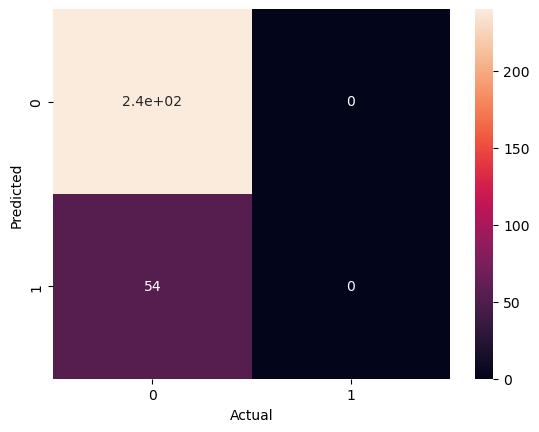

In [26]:
sns.heatmap(confusion_matrix(y_test,y_prd),annot=True)
plt.xlabel('Actual')
plt.ylabel('Predicted')

In [29]:
X.head(2)

,CF_age band,Education Field,Marital Status,Job Role
0,1,1,2,7
1,2,1,1,6


In [44]:
mod.predict([[3,2,5,7]])

C:\ProgramData\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


array([1], dtype=int64)